<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Create visualizations using Matplotib, Seaborn and Folium** 


# __Table of Contents__

<ol>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


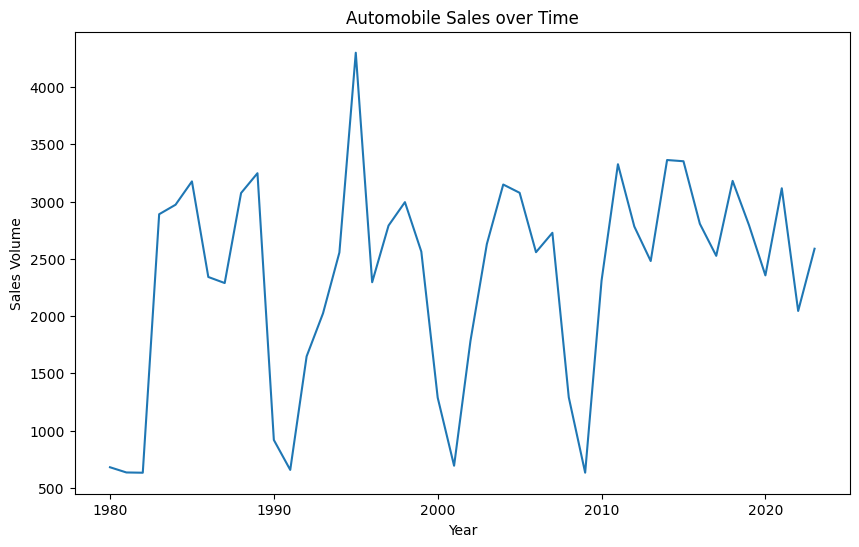

In [7]:
# Create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')

plt.show()

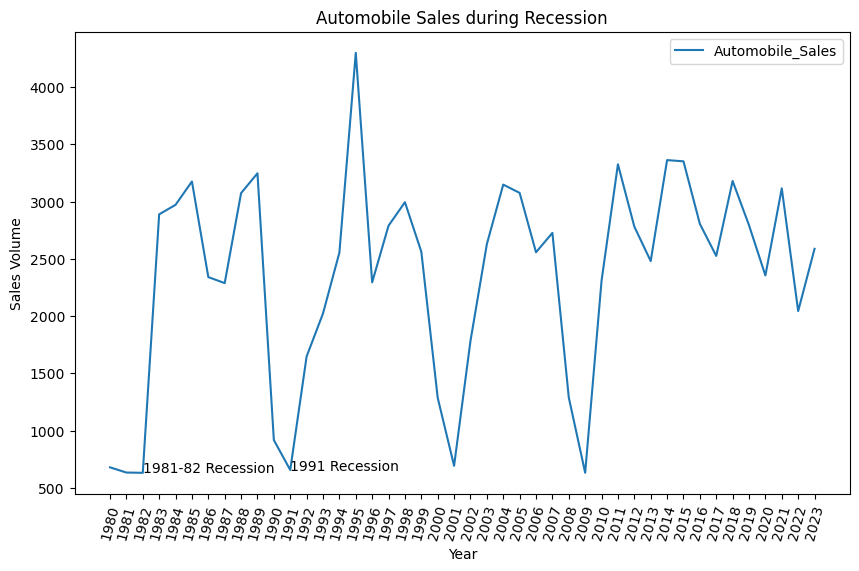

In [8]:
plt.figure(figsize=(10, 6))

df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1981-82 Recession')
plt.text(1991, df_line[1991], '1991 Recession')
plt.legend()
plt.savefig("Line_Plot_1.png")
plt.show()

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


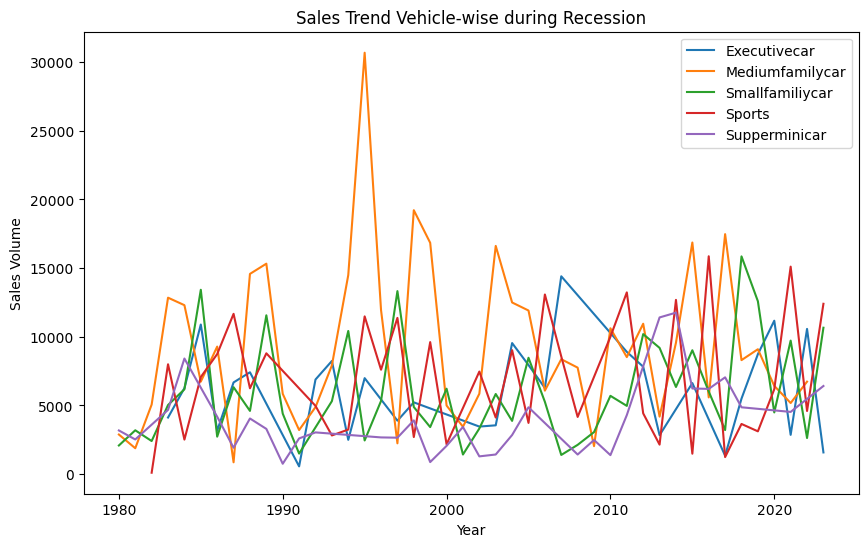

In [9]:
plt.figure(figsize=(10, 6))

df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()

plt.savefig("Line_Plot_2.png")
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br>


From this plot, we can understand that during the recession period, sales of sports and executive cars declined because of their high cost, while sales of superminis and small-family and medium-family vehicles increased.

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


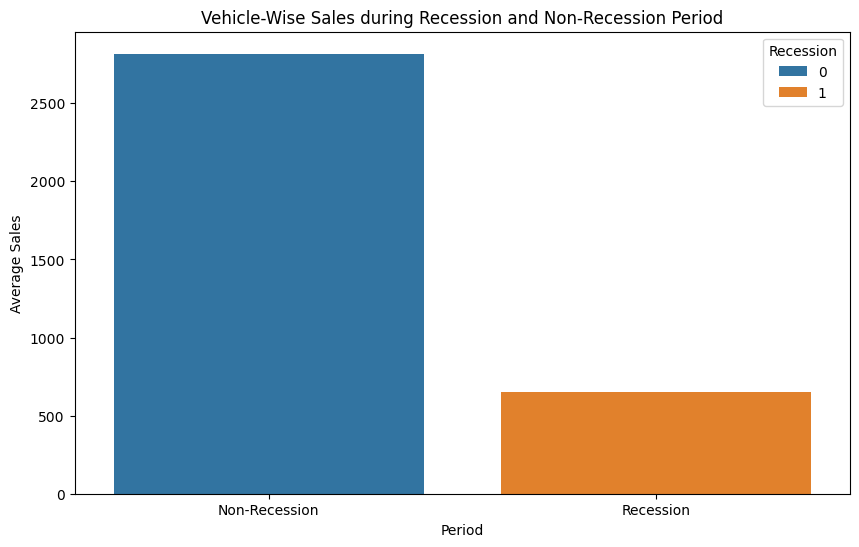

In [10]:
new_df = df.groupby(['Recession'])['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period


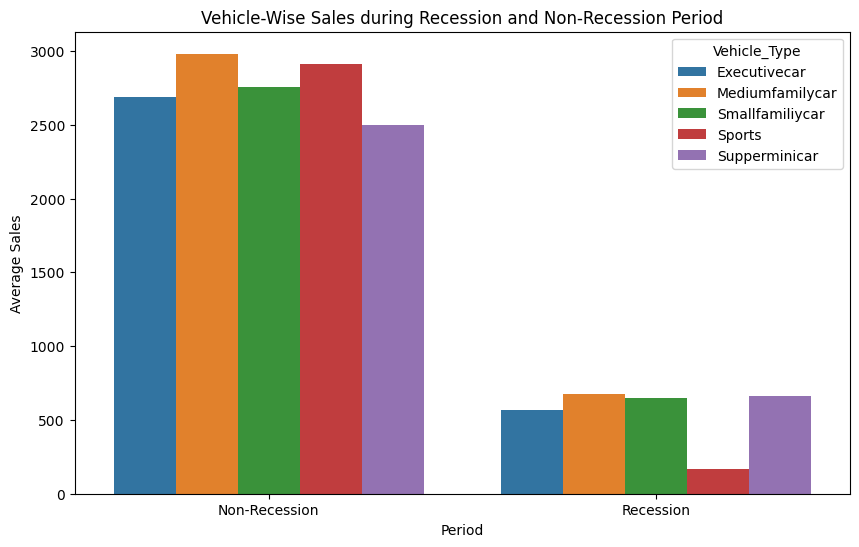

In [11]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.savefig("Bar_Chart.png")
plt.show()

### From the above chart what insights have you gained on the overall sales of automobiles during recession?


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>
#### How did the GDP vary over time during recession and non-recession periods? 


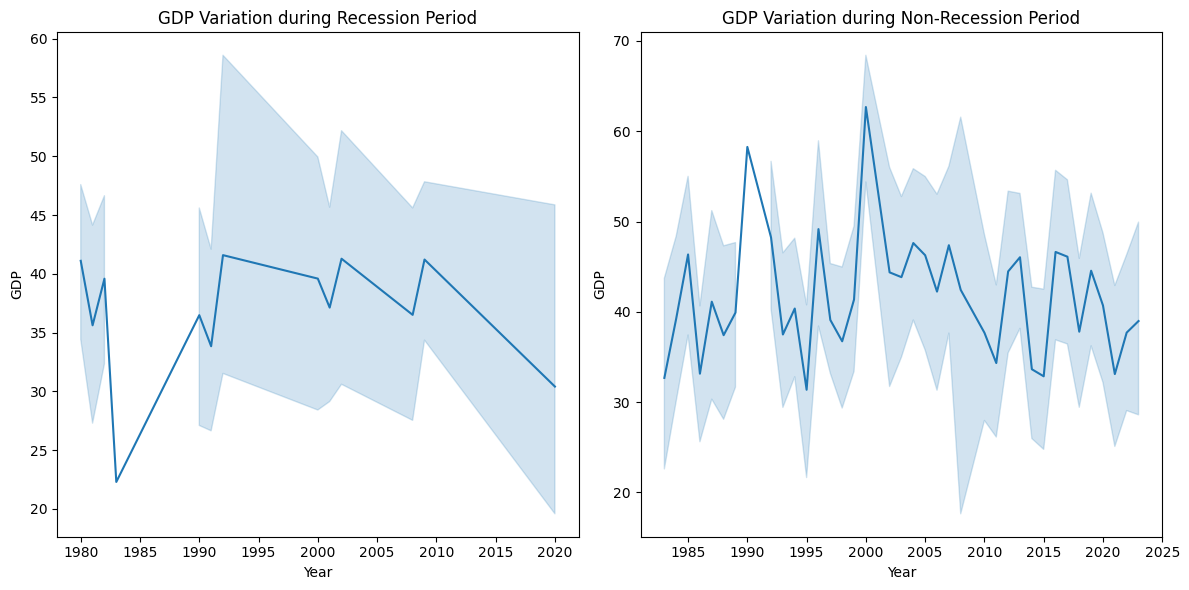

In [12]:
# Splitting data for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Creating subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting GDP variation during recession on the first subplot
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Plotting GDP variation during non-recession on the second subplot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.savefig("Subplot.png")
plt.show()

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.



---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble


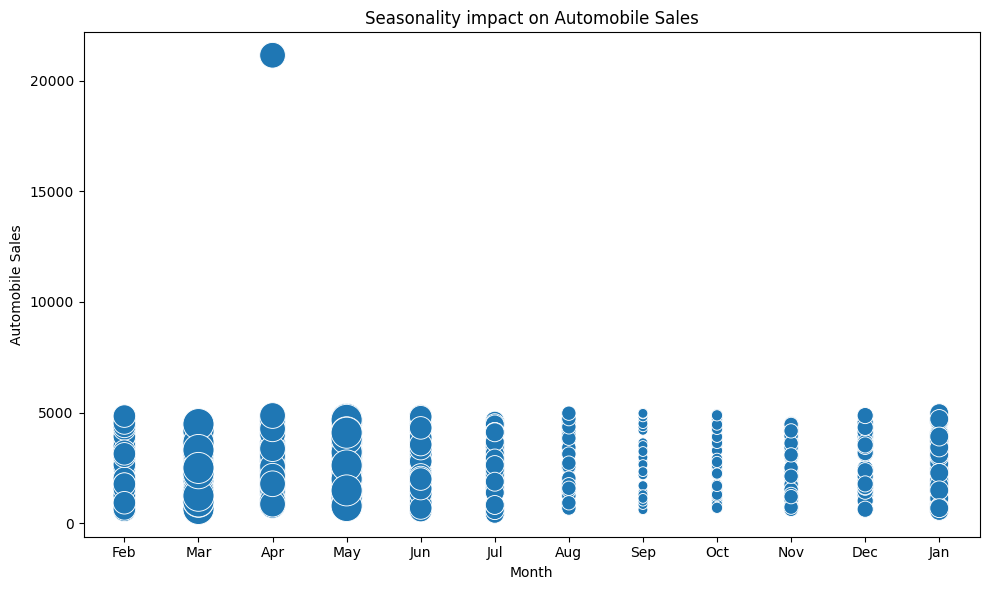

In [13]:
# Filtering for non-recession data
non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight'] * 10  # for bubble effect

# Creating the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(50, 500))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.tight_layout()
plt.savefig("Bubble.png")
plt.show()

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April



---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 



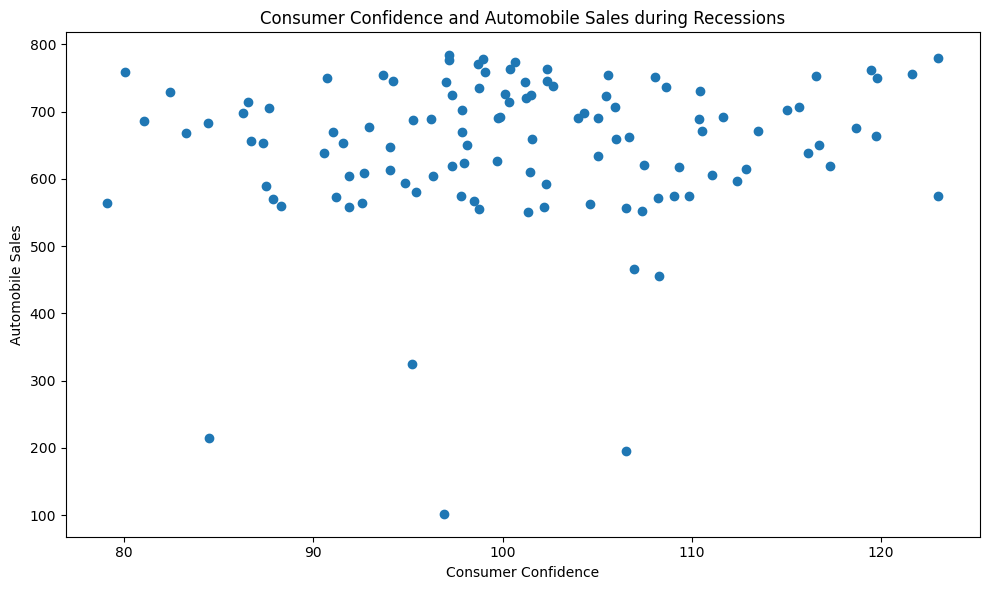

In [14]:
# Filtering for recession data
rec_data = df[df['Recession'] == 1]

# Creating a scatter plot for Consumer Confidence vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.tight_layout()
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?


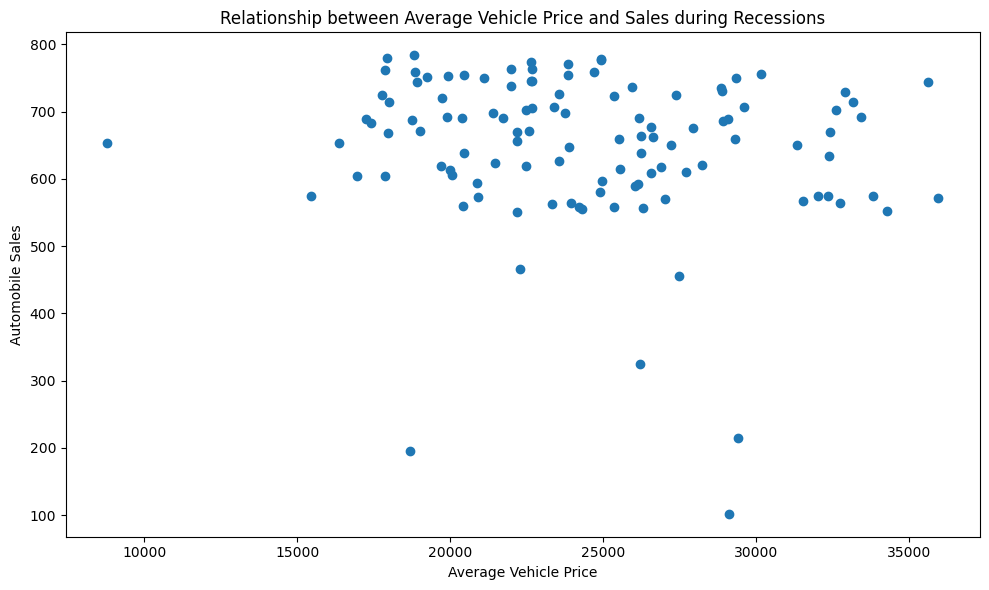

In [15]:
plt.figure(figsize=(10, 6))

plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()

### Inference
There is not much relation!


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


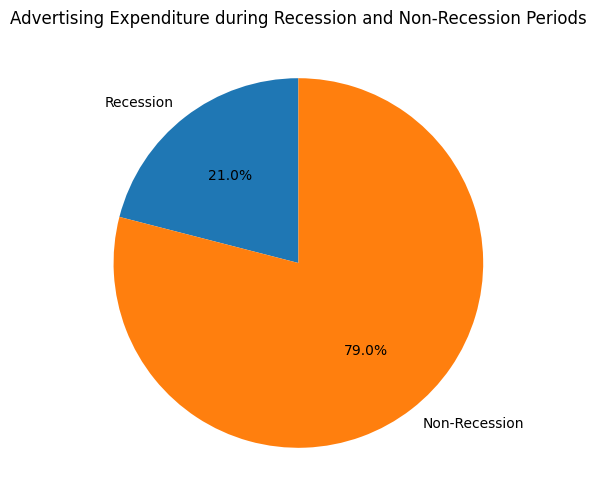

In [16]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Save the figure before showing it
plt.savefig("Pie_1.png") 

plt.show()

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> 

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


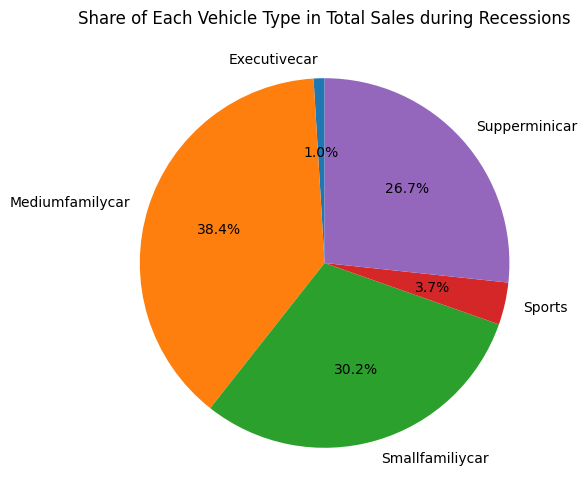

In [18]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.savefig("Pie_2.png") 
plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period


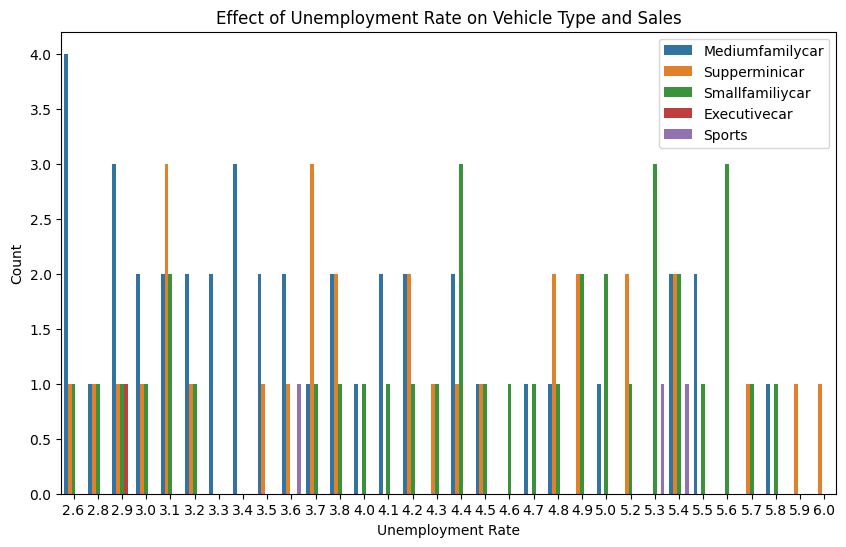

In [20]:
# Filter out the data for recession period
data= df[df['Recession'] == 1]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

plt.savefig("line_plot_3")
plt.show()

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br>

Based on the count plot that visualizes the impact of the unemployment rate on vehicle sales during a recession, the following observations can be drawn:

Superminicar: As the unemployment rate increases, sales of superminicars tend to increase. This suggests that consumers may prefer more economical and affordable vehicles during an economic downturn.

Small family car: Similarly, sales of small family cars also show an upward trend with increasing unemployment rates. This further supports the notion that during a recession, consumers might be more inclined towards more cost-effective vehicles that provide better value for money.

Medium minicar: The sales trend for medium minicars appears consistent across varying unemployment rates. This suggests that medium minicars might be a popular choice irrespective of the economic conditions, possibly due to their balance between affordability and features.

In summary, during recession periods characterized by higher unemployment rates, consumer preference shifts towards more affordable vehicle options. This behaviour can be attributed to the financial constraints and uncertainty people face during such times, leading them to make more conservative spending decisions.

---


### TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [17]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [21]:
import folium

# Filter the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1